<ipython-input-1-9f966fcc46d4>:26: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x], zdir='x',colors=('red',))
<ipython-input-1-9f966fcc46d4>:31: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y], zdir='y', colors=('red',))
<ipython-input-1-9f966fcc46d4>:36: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z], zdir='z', colors=('r',))


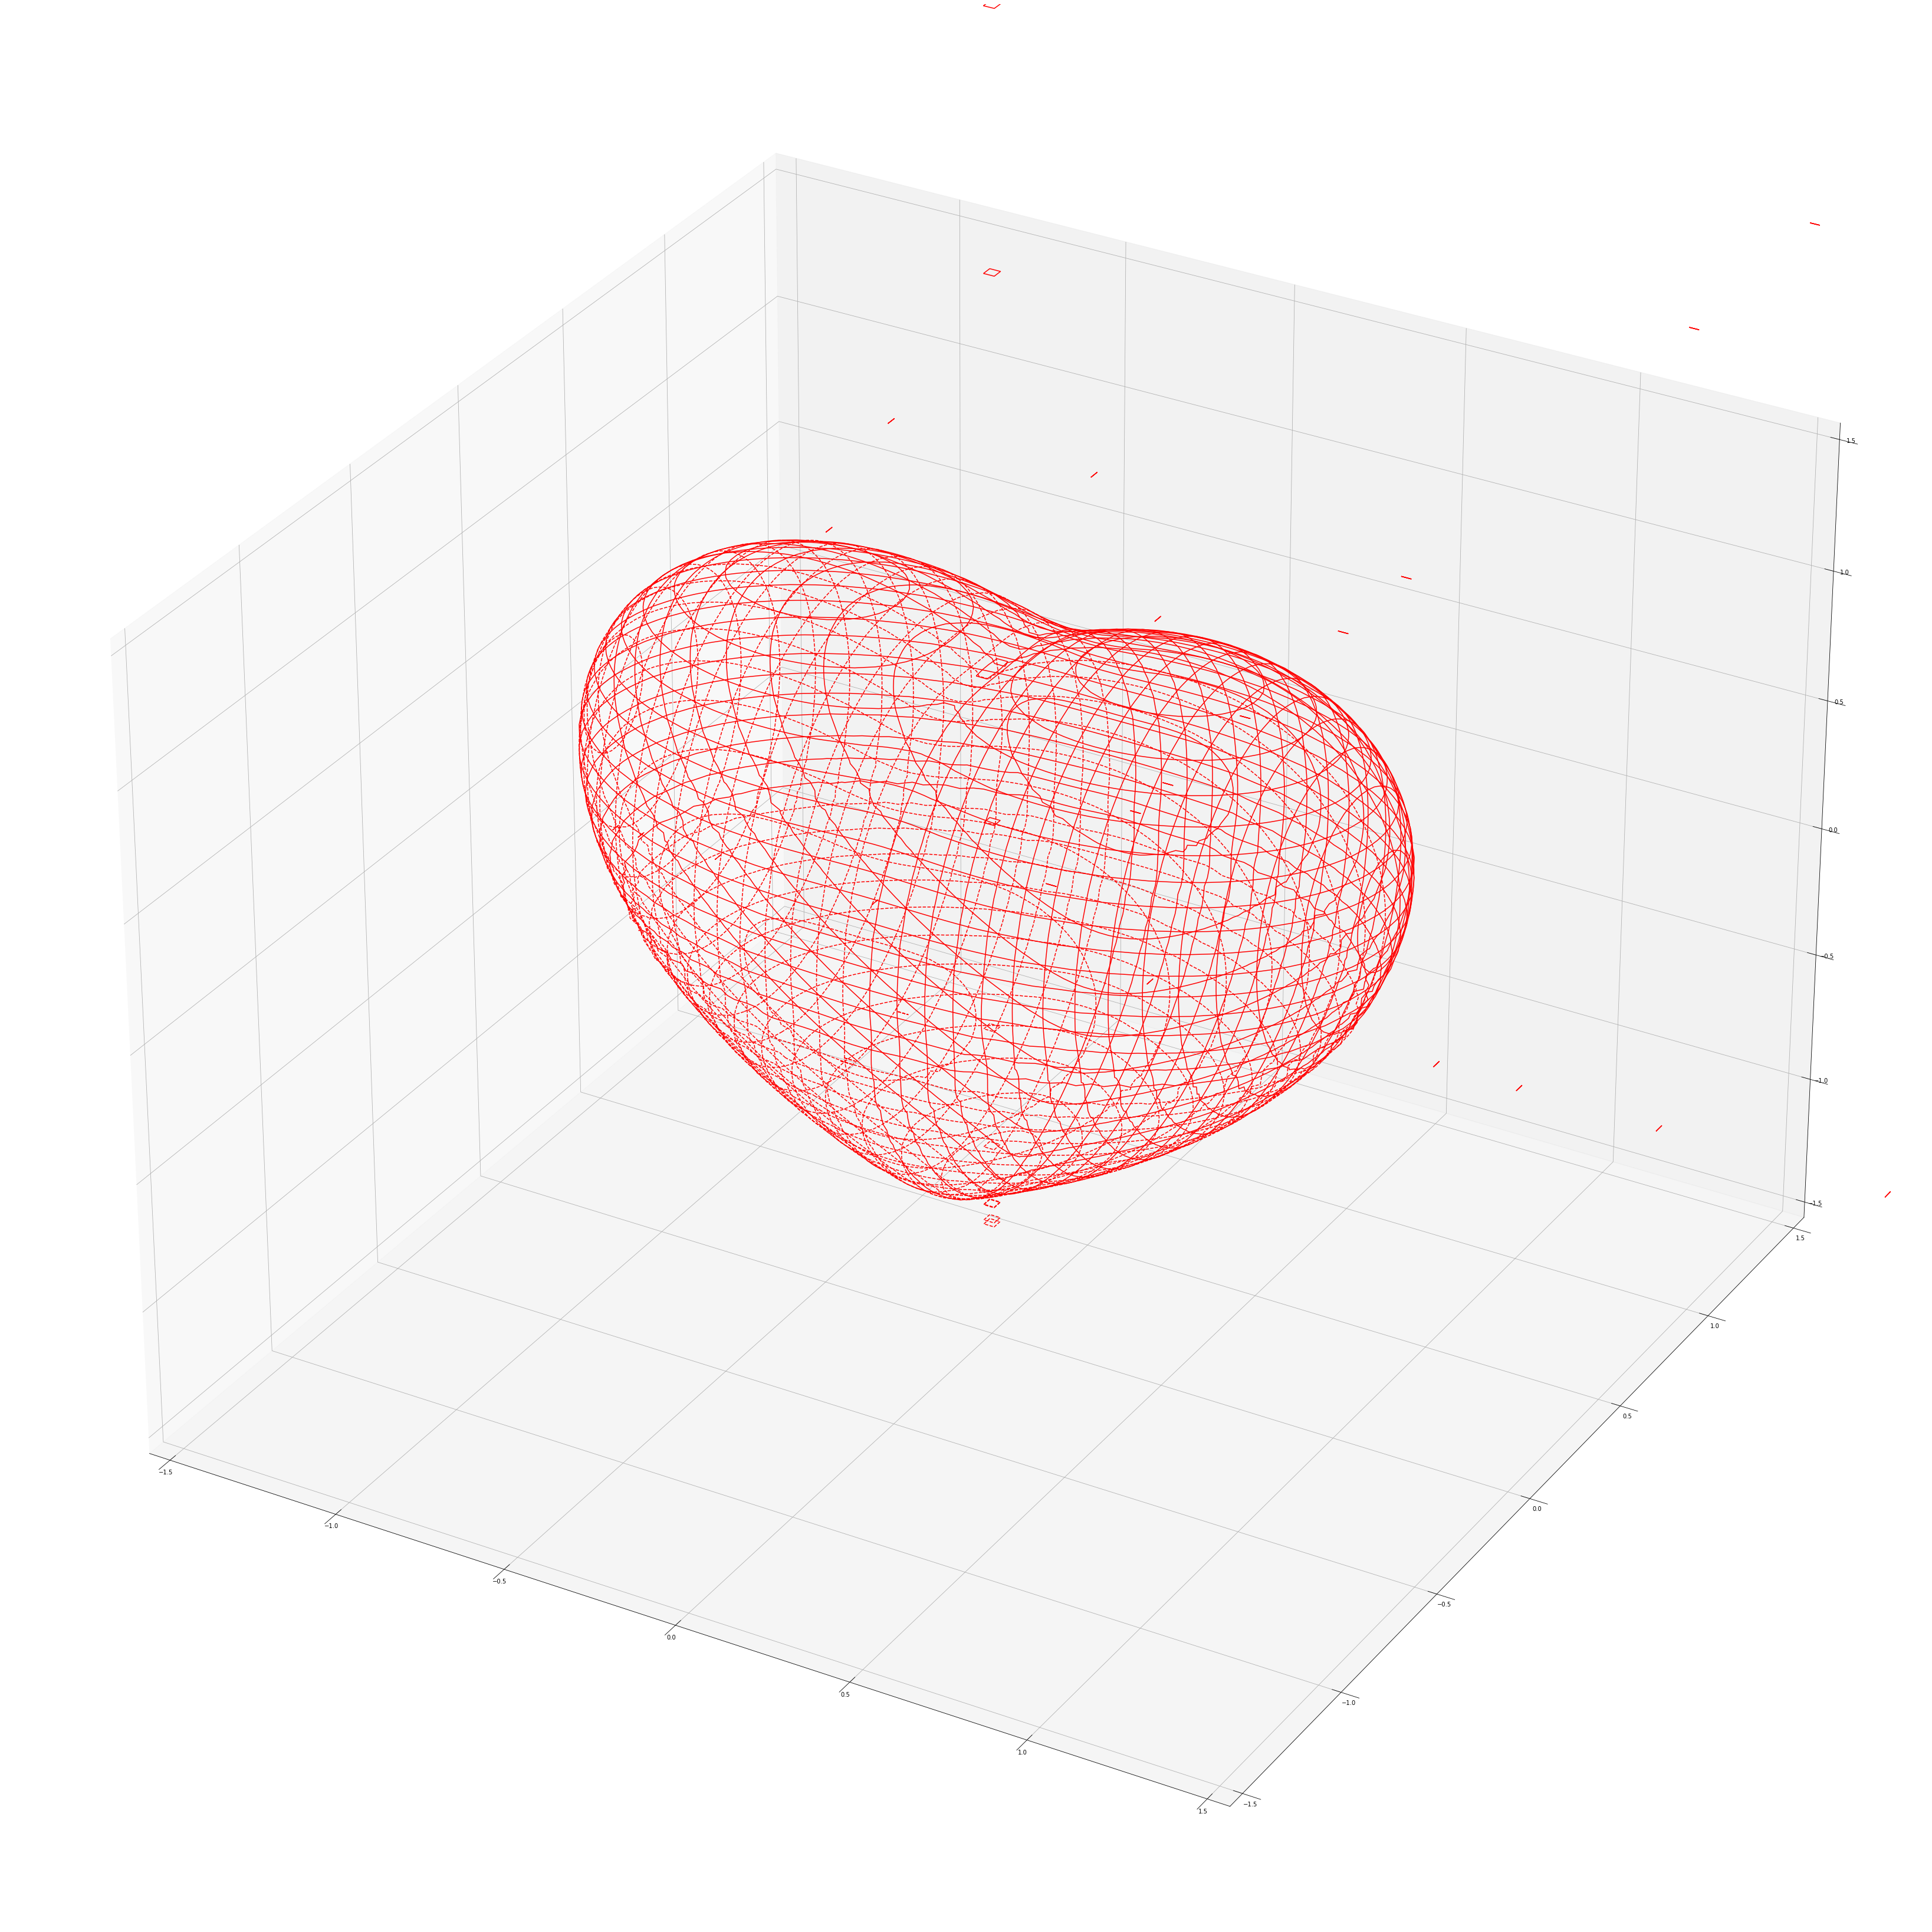

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np


def heart(x,y,z):
   return (x**2+(9/4)*y**2+z**2-1)**3-x**2*z**3-(9/80)*y**2*z**3


def plot_implicit(fn, bbox=(-1.5, 1.5)):
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure(figsize = (60, 60))
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 40) # number of slices
    A1, A2 = np.meshgrid(A, A) # grid on which the contour is plotted

    for x in B: # plot contours in the YZ plane
        Y, Z = A1, A2
        X = fn(x, Y, Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x',colors=('red',))
        
    for y in B:  # plot contours in the XZ plane
        X, Z = A1, A2
        Y = fn(X, y, Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y', colors=('red',))

    for z in B: # plot contours in the XY plane
        X, Y = A1, A2
        Z = fn(X, Y, z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z', colors=('r',))
        
    ax.set_zlim3d(zmin, zmax)
    ax.set_xlim3d(xmin, xmax)
    ax.set_ylim3d(ymin, ymax)
    plt.show()

if __name__ == '__main__':
    plot_implicit(heart)